Determining the survival posaibalitiy


In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data=pd.read_csv('/content/titanic_data.csv')

In [3]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [6]:
titanic_data[0:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [16]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0


In [9]:
titanic_data[titanic_data.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,S
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
888,0,3,female,NaN,1,2,23.4500,NaN,S


In [10]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [13]:
titanic_data.dropna(axis=1,inplace=True)

In [15]:
titanic_data.shape

(891, 6)

Creating a Dummy Column

In [19]:
Sex_Dummy=pd.get_dummies(titanic_data['Sex'], dtype=float,drop_first=True)
Sex_Dummy

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


0=Female and 1=Male

In [27]:
titanic_data=pd.concat([titanic_data,Sex_Dummy],axis=1)

In [28]:
titanic_data

,Survived,Pclass,Sex,SibSp,Parch,Fare,male,male
0,0,3,male,1,0,7.2500,1.0,1.0
1,1,1,female,1,0,71.2833,0.0,0.0
2,1,3,female,0,0,7.9250,0.0,0.0
3,1,1,female,1,0,53.1000,0.0,0.0
4,0,3,male,0,0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,1.0,1.0
887,1,1,female,0,0,30.0000,0.0,0.0
888,0,3,female,1,2,23.4500,0.0,0.0
889,1,1,male,0,0,30.0000,1.0,1.0


In [29]:
titanic_data = titanic_data.loc[:, ~titanic_data.columns.duplicated()]


In [31]:
titanic_data.drop('Sex',axis=1,inplace=True)

In [32]:
titanic_data.rename({'male':'Sex_Dummy'},axis=1,inplace=True)

In [36]:
titanic_data[0:3]

,Survived,Pclass,SibSp,Parch,Fare,Sex_Dummy
0,0,3,1,0,7.2500,1.0
1,1,1,1,0,71.2833,0.0
2,1,3,0,0,7.9250,0.0


Creating a Model

In [39]:
x=titanic_data.iloc[:,1:] #independent variable
print(x)
y=titanic_data.iloc[:,0] #depedent variable
print(y)

     Pclass  SibSp  Parch     Fare  Sex_Dummy
0         3      1      0   7.2500        1.0
1         1      1      0  71.2833        0.0
2         3      0      0   7.9250        0.0
3         1      1      0  53.1000        0.0
4         3      0      0   8.0500        1.0
..      ...    ...    ...      ...        ...
886       2      0      0  13.0000        1.0
887       1      0      0  30.0000        0.0
888       3      1      2  23.4500        0.0
889       1      0      0  30.0000        1.0
890       3      0      0   7.7500        1.0

[891 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [65]:
# Creating the modelso that we can fit the values into it
from sklearn.linear_model import LogisticRegression
logimodel=LogisticRegression()
logimodel.fit(x,y)

LogisticRegression()

In [66]:
logimodel.coef_

array([[-0.81022497, -0.24822014, -0.07692163,  0.00352514, -2.65440211]])

In [68]:
Beta_Cofficient=pd.Series(logimodel.coef_[0])
Beta_Cofficient

,0
0,-0.810225
1,-0.248220
2,-0.076922
3,0.003525
4,-2.654402


In [69]:
logimodel.intercept_

array([3.01493079])

In [70]:
logimodel.classes_

array([0, 1])

In [75]:
import numpy as np
np.set_printoptions(suppress=True)
pred_prob=logimodel.predict_proba(x)
pred_prob

array([[0.90827974, 0.09172026],
       [0.099055  , 0.900945  ],
       [0.3515592 , 0.6484408 ],
       ...,
       [0.43417015, 0.56582985],
       [0.58514782, 0.41485218],
       [0.88522076, 0.11477924]])

In [122]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob.rename({0:'Probability of the survival',1:'Probability of not survival'},axis=1,inplace=True)
pred_prob['Prediction_Manually']=pred_prob.iloc[:,1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob['Prediction_Model']=logimodel.predict(x)
pred_prob['Prediction_Conclusion']=pred_prob.iloc[:,2].apply(lambda x: "Survived" if x==0 else "Not survived")
pred_prob

,Probability of the survival,Probability of not durvival,Prediction_Manually,Prediction_Model,Prediction_Conclusion
0,0.908280,0.091720,0,0,Survived
1,0.099055,0.900945,1,1,Not survived
2,0.351559,0.648441,1,1,Not survived
3,0.104924,0.895076,1,1,Not survived
4,0.885113,0.114887,0,0,Survived
...,...,...,...,...,...
886,0.771023,0.228977,0,0,Survived
887,0.090260,0.909740,1,1,Not survived
888,0.434170,0.565830,1,1,Not survived
889,0.585148,0.414852,0,0,Survived


In [134]:
# prediction value of the x
y_pred=logimodel.predict(x)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [114]:
y_pred_df=pd.DataFrame({'Actual':y,'Prediction':logimodel.predict(x)})
y_pred_df
y_pred_df['Actual Conclusion']=pred_prob.iloc[:,0].apply(lambda x: "Survived" if x==0 else "Not survived")
y_pred_df['Model Conclusion']=pred_prob.iloc[:,1].apply(lambda x: "Survived" if x==0 else "Not survived")
Outcome=[]
for i in range(len(y_pred_df)):
 if(y_pred_df.loc[i,'Actual']==0 & y_pred_df.loc[i,'Prediction']==0):
    Outcome.append('True Negative')
 elif (y_pred_df.loc[i,'Actual']==1 &y_pred_df.loc[i,'Prediction']==1):
    Outcome.append('True Positive')
 elif (y_pred_df.loc[i,'Actual']==0 &y_pred_df.loc[i,'Prediction']==1):
   Outcome.append('False Positive')
 elif (y_pred_df.loc[i,'Actual']==1 &y_pred_df.loc[i,'Prediction']==0):
   Outcome.append('False Negative')
 else:
   Outcome.append('Not valid')



In [117]:
y_pred_df['Outcome']=Outcome
y_pred_df[0:12]

,Actual,Prediction,Actual Conclusion,Model Conclusion,Outcome
0,0,0,Not survived,Not survived,True Negative
1,1,1,Not survived,Not survived,True Positive
2,1,1,Not survived,Not survived,True Positive
3,1,1,Not survived,Not survived,True Positive
4,0,0,Not survived,Not survived,True Negative
5,0,0,Not survived,Not survived,True Negative
6,0,0,Not survived,Not survived,True Negative
7,0,0,Not survived,Not survived,True Negative
8,1,1,Not survived,Not survived,True Positive
9,1,1,Not survived,Not survived,True Positive


In [119]:
#checking the accuracy of the model we going to create classfiction report and confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.77      0.78       891
weighted avg       0.79      0.80      0.79       891



In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[477,  72],
       [110, 232]])

In [124]:
# we can also calculate the accuracy from the sklearn model
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7957351290684624

In [125]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.718266253869969

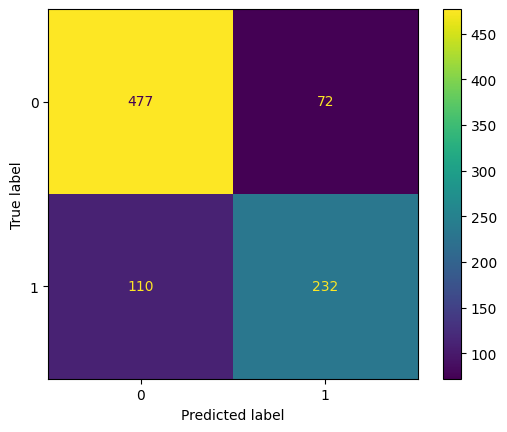

In [133]:
y_pred = logimodel.predict(x)
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y,y_pred,labels=[0,1])
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm)
print(cm_display)
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()